In [1]:
import pandas as pd
import numpy as np

In [2]:
data_folder = '/home/robert/data/Hackathon/'

In [3]:
import os
os.listdir(data_folder)

['WBvFremantle_WideFormat.csv',
 'WBvFreMatchTimes.txt',
 '.~lock.player_team.csv#',
 'player_team.csv',
 'MatchSim15v15_PlayerLocation.csv',
 'Player Team Allocations 15v15 Match Play.xlsx',
 'WBvFremantlePlaybyPlay.xlsx',
 'MatchSim15v15PlaybyPlay.txt',
 'MatchSim15v15.mov',
 'WBvFremantle_Longformat.txt',
 'WB v FREMANTLE.mov']

In [4]:
!head /home/robert/data/Hackathon/MatchSim15v15_PlayerLocation.csv

In [5]:
player_positions = pd.read_csv("/home/robert/data/Hackathon/MatchSim15v15_PlayerLocation.csv", index_col="Time", parse_dates=["Time"])

In [6]:
player_positions.head()

,BIGGS_X,BIGGS_Y,TBOYD_X,TBOYD_Y,CAMPBELL_X,CAMPBELL_Y,CLOKE_X,CLOKE_Y,COLLINS_X,COLLINS_Y,...,ROBERTS_Y,SMITH_X,SMITH_Y,STRINGER_X,STRINGER_Y,WEBB_X,WEBB_Y,WILLIAMS_X,WILLIAMS_Y,INPERIOD
Time,,,,,,,,,,,,,,,,,,,,,
01:20.5,-5883.428678,3321.405380,-5897.969105,3296.898876,-5898.370317,3328.320628,-5886.543428,3366.577187,-5903.165953,3297.916282,...,3385.309733,-5881.801840,3324.847318,-5888.350164,3380.694167,-5890.376870,3345.274942,-5898.591764,3305.511465,NaN
01:20.6,-5883.102906,3321.527705,-5897.925245,3297.143092,-5898.467202,3328.331657,-5886.270552,3366.777169,-5903.130805,3298.027300,...,3385.420726,-5881.617123,3325.169329,-5888.279818,3380.849607,-5890.209545,3345.286161,-5898.794452,3305.688908,NaN
01:20.7,-5882.733123,3321.683360,-5897.916668,3297.464977,-5898.581645,3328.264980,-5886.076971,3367.021492,-5903.095665,3298.149417,...,3385.587228,-5881.405937,3325.424763,-5888.200706,3381.060549,-5890.068577,3345.208567,-5898.979510,3305.844165,NaN
01:20.8,-5882.354477,3321.761325,-5897.934449,3297.698049,-5898.775439,3328.320337,-5885.786505,3367.254784,-5903.034127,3298.304851,...,3385.775934,-5881.212484,3325.846674,-5888.104026,3381.338100,-5889.901330,3345.330779,-5899.138195,3306.066037,NaN
01:20.9,-5882.055110,3321.861433,-5897.978619,3297.886705,-5899.066166,3328.453320,-5885.513677,3367.521362,-5902.954984,3298.471397,...,3385.953548,-5880.992563,3326.202008,-5888.095370,3381.548993,-5889.760537,3345.497369,-5899.296967,3306.410001,NaN


In [7]:
player_positions.index

Index(['01:20.5', '01:20.6', '01:20.7', '01:20.8', '01:20.9', '01:21.0',
       '01:21.1', '01:21.2', '01:21.3', '01:21.4',
       ...
       '56:26.1', '56:26.2', '56:26.3', '56:26.4', '56:26.5', '56:26.6',
       '56:26.7', '56:26.8', '56:26.9', '56:27.0'],
      dtype='object', name='Time', length=33066)

In [8]:
player_positions.index = pd.to_datetime(player_positions.index, format='%M:%S.%f').time

In [9]:
player_positions.head()

,BIGGS_X,BIGGS_Y,TBOYD_X,TBOYD_Y,CAMPBELL_X,CAMPBELL_Y,CLOKE_X,CLOKE_Y,COLLINS_X,COLLINS_Y,...,ROBERTS_Y,SMITH_X,SMITH_Y,STRINGER_X,STRINGER_Y,WEBB_X,WEBB_Y,WILLIAMS_X,WILLIAMS_Y,INPERIOD
00:01:20.500000,-5883.428678,3321.405380,-5897.969105,3296.898876,-5898.370317,3328.320628,-5886.543428,3366.577187,-5903.165953,3297.916282,...,3385.309733,-5881.801840,3324.847318,-5888.350164,3380.694167,-5890.376870,3345.274942,-5898.591764,3305.511465,NaN
00:01:20.600000,-5883.102906,3321.527705,-5897.925245,3297.143092,-5898.467202,3328.331657,-5886.270552,3366.777169,-5903.130805,3298.027300,...,3385.420726,-5881.617123,3325.169329,-5888.279818,3380.849607,-5890.209545,3345.286161,-5898.794452,3305.688908,NaN
00:01:20.700000,-5882.733123,3321.683360,-5897.916668,3297.464977,-5898.581645,3328.264980,-5886.076971,3367.021492,-5903.095665,3298.149417,...,3385.587228,-5881.405937,3325.424763,-5888.200706,3381.060549,-5890.068577,3345.208567,-5898.979510,3305.844165,NaN
00:01:20.800000,-5882.354477,3321.761325,-5897.934449,3297.698049,-5898.775439,3328.320337,-5885.786505,3367.254784,-5903.034127,3298.304851,...,3385.775934,-5881.212484,3325.846674,-5888.104026,3381.338100,-5889.901330,3345.330779,-5899.138195,3306.066037,NaN
00:01:20.900000,-5882.055110,3321.861433,-5897.978619,3297.886705,-5899.066166,3328.453320,-5885.513677,3367.521362,-5902.954984,3298.471397,...,3385.953548,-5880.992563,3326.202008,-5888.095370,3381.548993,-5889.760537,3345.497369,-5899.296967,3306.410001,NaN


In [10]:
player_positions["LIBERATORE_X"] = player_positions["LIBEREATORE_X"]
del player_positions["LIBEREATORE_X"]

In [11]:
del player_positions["INPERIOD"]

In [12]:
player_positions.columns

Index(['BIGGS_X', 'BIGGS_Y', 'TBOYD_X', 'TBOYD_Y', 'CAMPBELL_X', 'CAMPBELL_Y',
       'CLOKE_X', 'CLOKE_Y', 'COLLINS_X', 'COLLINS_Y', 'CRAMERI_X',
       'CRAMERI_Y', 'DAHLHAUS_X', 'DAHLHAUS_Y', 'DALE_X', 'DALE_Y', 'DANIEL_X',
       'DANIEL_Y', 'DUNKLEY_X', 'DUNKLEY_Y', 'ENGLISH_X', 'ENGLISH_Y',
       'HAMILTON_X', 'HAMILTON_Y', 'HONEYCHURCH_X', 'HONEYCHURCH_Y',
       'HUNTER_X', 'HUNTER_Y', 'JOHANNISEN_X', 'JOHANNISEN_Y', 'LYNCH_X',
       'LYNCH_Y', 'JONG_X', 'JONG_Y', 'LIBERATORE_Y', 'LIPINSKI_X',
       'LIPINSKI_Y', 'MURPHY_X', 'MURPHY_Y', 'MCLEAN_X', 'MCLEAN_Y',
       'MORRIS_X', 'MORRIS_Y', 'MULLENGER_X', 'MULLENGER_Y', 'ROUGHEAD_X',
       'ROUGHEAD_Y', 'PICKEN_X', 'PICKEN_Y', 'ROBERTS_X', 'ROBERTS_Y',
       'SMITH_X', 'SMITH_Y', 'STRINGER_X', 'STRINGER_Y', 'WEBB_X', 'WEBB_Y',
       'WILLIAMS_X', 'WILLIAMS_Y', 'LIBERATORE_X'],
      dtype='object')

In [13]:
x_cols = [c for c in player_positions.columns if c.endswith("_X")]
min_x, max_x = np.nanmin(player_positions[x_cols].values), np.nanmax(player_positions[x_cols].values)
min_x, max_x

(-5973.6901530000005, -5842.9004079999995)

In [14]:
y_cols = [c for c in player_positions.columns if c.endswith("_Y")]
min_y, max_y = np.nanmin(player_positions[y_cols].values), np.nanmax(player_positions[y_cols].values)
min_y, max_y

(3256.1355370000001, 3429.2074499999999)

In [15]:
%matplotlib inline

/home/robert/Programs/anaconda3/envs/hack/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [16]:
from matplotlib import pyplot as plt

In [17]:
import numpy as np
p1 = np.vstack([player_positions.ix[0].values[i:i+2] for i in range(0, len(player_positions.columns), 2)])

In [18]:
p1

array([[-5883.428678,  3321.40538 ],
       [-5897.969105,  3296.898876],
       [-5898.370317,  3328.320628],
       [-5886.543428,  3366.577187],
       [-5903.165953,  3297.916282],
       [-5914.223449,  3341.284295],
       [-5895.207081,  3338.500927],
       [-5887.519099,  3339.272282],
       [-5904.926246,  3320.934909],
       [-5904.736044,  3350.448009],
       [-5890.556409,  3386.952576],
       [-5888.484645,  3347.074378],
       [-5882.427399,  3349.864629],
       [-5915.137896,  3339.219173],
       [-5899.245012,  3356.81183 ],
       [-5902.371499,  3319.937808],
       [-5883.051738,  3348.52117 ],
       [ 3341.442409, -5901.763361],
       [ 3307.018692, -5878.641191],
       [ 3351.01056 , -5890.753627],
       [ 3342.555351, -5894.496879],
       [ 3367.52603 , -5891.413911],
       [ 3379.138075, -5899.857282],
       [ 3350.917678, -5889.800872],
       [ 3340.325079, -5890.766604],
       [ 3385.309733, -5881.80184 ],
       [ 3324.847318, -5888.350164],
 

In [19]:
teams = pd.read_csv("/home/robert/data/Hackathon/player_team.csv")
teams['Player'] = teams["Player"].apply(str.upper)

In [20]:
teams.head()

,Player,Team
0,CAMPBELL,Blue
1,WEBB,Blue
2,DAHLHAUS,Blue
3,PICKEN,Blue
4,CRAMERI,Blue


In [21]:
blue_players = teams[teams["Team"] == "Blue"]['Player'].values
yellow_players = teams[teams["Team"] == "Yellow"]['Player'].values

In [22]:
blue_players, yellow_players

(array(['CAMPBELL', 'WEBB', 'DAHLHAUS', 'PICKEN', 'CRAMERI', 'DALE',
        'COLLINS', 'BIGGS', 'LYNCH', 'CORDY', 'CLOKE', 'ENGLISH',
        'STRINGER', 'HONEYCHURCH', 'DUNKLEY', 'WILLIAMS'], dtype=object),
 array(['ROUGHEAD', 'JONG', 'LIBERATORE', 'MCLEAN', 'HAMILTON', 'HUNTER',
        'JOHANNISEN', 'MURPHY', 'MULLENGER', 'MORRIS', 'ROBERTS', 'TBOYD',
        'SMITH', 'DANIEL', 'LIPINSKI'], dtype=object))

In [23]:
for column in player_positions.columns:
    if column.split("_")[0] in blue_players:
        pass  #print(column, "blue")
    elif column.split("_")[0] in yellow_players:
        pass  #print(column, "yellow")
    else:
        print(column, "unknown")

In [24]:
g = player_positions.iterrows()

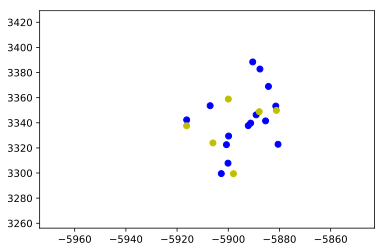

In [25]:
for i in range(10):
    rownum, row = next(g)
    
fig, ax = plt.subplots()
ax.set_xlim(min_x, max_x)
ax.set_ylim(min_y, max_y)
for team_color, team in [("b", blue_players), ("y", yellow_players)]:
    player_values = [row[column] for column in player_positions.columns if column.split("_")[0] in team]
    p1 = np.vstack([player_values[i:i+2] for i in range(0, len(player_values), 2)])
    plt.scatter(p1[:,0], p1[:,1], c=team_color)

In [32]:
%config InlineBackend.figure_format = 'png'

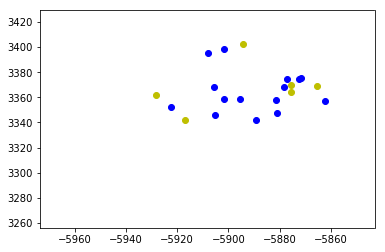

In [45]:
fig, ax = plt.subplots()

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    rownum, row = next(g)
    plt.cla()
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    for team_color, team in [("b", blue_players), ("y", yellow_players)]:
        player_values = [row[column] for column in player_positions.columns if column.split("_")[0] in team]
        p1 = np.vstack([player_values[i:i+2] for i in range(0, len(player_values), 2)])
        plt.scatter(p1[:,0], p1[:,1], c=team_color)
    #line.set_data(x, y)
    return (line,)

import matplotlib.animation as animation
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=1000, interval=10, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())